In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df_test = pd.read_csv('../data/raw/test.csv')
df_train = pd.read_csv('../data/raw/train.csv')

In [29]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Estandarizar

In [30]:
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'Q': 1, 'C': 2})

In [31]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})

### Sustituir NaNs

In [32]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Edad

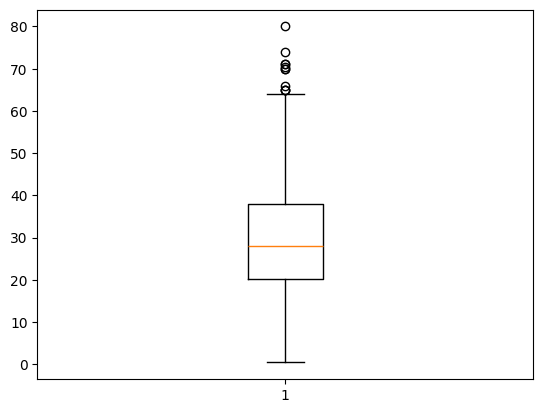

In [33]:
plt.boxplot(df_train["Age"].dropna())
plt.show()
#Como tiene valores atipicos se reemplaza con la mediana

In [34]:
mediana_edad = df_train['Age'].median()
mediana_edad

28.0

In [35]:
df_train['Age'] = df_train['Age'].fillna(mediana_edad)

In [36]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Cabina

In [37]:
np.random.seed(999)
null = df_train["Cabin"].index[df_train["Cabin"].isna()]
no_null = df_train["Cabin"].dropna().unique()
df_train.loc[null, "Cabin"] = np.random.choice(no_null, size=len(null))

In [38]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

### Embarked

In [39]:
moda_embarked = df_train['Embarked'].mode()[0]
moda_embarked

0.0

In [40]:
df_train['Embarked'] = df_train['Embarked'].fillna(moda_embarked)

In [41]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [42]:
df_train.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B38,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,E68,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,E31,0.0
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,B20,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,B78,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,A36,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,B35,2.0


### Estandarizar (Parte dificil y de prueba dios ayuda)

In [43]:
df_train.drop(columns=['Name'], inplace=True)

In [44]:
df_train.drop(columns=['Ticket'], inplace=True)

In [45]:
df_train['Floor'] = df_train['Cabin'].str.slice(stop=1)
df_train['Room'] = df_train['Cabin'].str.slice(start=1)
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Floor,Room
0,1,0,3,1,22.0,1,0,7.2500,B38,0.0,B,38
1,2,1,1,0,38.0,1,0,71.2833,C85,2.0,C,85
2,3,1,3,0,26.0,0,0,7.9250,E68,0.0,E,68
3,4,1,1,0,35.0,1,0,53.1000,C123,0.0,C,123
4,5,0,3,1,35.0,0,0,8.0500,E31,0.0,E,31
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,C50,0.0,C,50
887,888,1,1,0,19.0,0,0,30.0000,B42,0.0,B,42
888,889,0,3,0,28.0,1,2,23.4500,A5,0.0,A,5
889,890,1,1,1,26.0,0,0,30.0000,C148,2.0,C,148


In [46]:
df_train.drop(columns=['Cabin'], inplace=True)

In [47]:
df_train['Floor'] = df_train['Floor'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4})
df_train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Floor,Room
0,1,0,3,1,22.0,1,0,7.2500,0.0,1.0,38
1,2,1,1,0,38.0,1,0,71.2833,2.0,2.0,85
2,3,1,3,0,26.0,0,0,7.9250,0.0,4.0,68
3,4,1,1,0,35.0,1,0,53.1000,0.0,2.0,123
4,5,0,3,1,35.0,0,0,8.0500,0.0,4.0,31
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0.0,2.0,50
887,888,1,1,0,19.0,0,0,30.0000,0.0,1.0,42
888,889,0,3,0,28.0,1,2,23.4500,0.0,0.0,5
889,890,1,1,1,26.0,0,0,30.0000,2.0,2.0,148


In [62]:
df_train['Floor'] = df_train['Floor'].fillna(df_train['Floor'].mode()[0])

# KNN